Loading Libraries

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

Loading Spaceship Titanic Tataset

In [21]:
spaceship=pd.read_csv(r"C:\Users\umite\Desktop\vs_yapay_zeka\spaceship_titanic\spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Dataset Shape

In [22]:
spaceship.shape

(8693, 14)

Dataset Information 

In [23]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Numerical Features

In [24]:
spaceship.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


Null Values in Dataset

<AxesSubplot:>

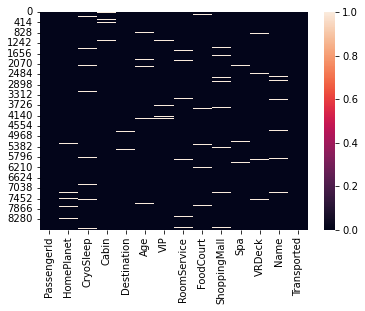

In [25]:
sns.heatmap(spaceship.isnull())

Number of Unique Values

In [26]:
print(spaceship["Destination"].nunique())
print(spaceship["HomePlanet"].nunique())
print(spaceship["CryoSleep"].nunique())
print(spaceship["Cabin"].nunique())

3
3
2
6560


Correlation Map

<AxesSubplot:>

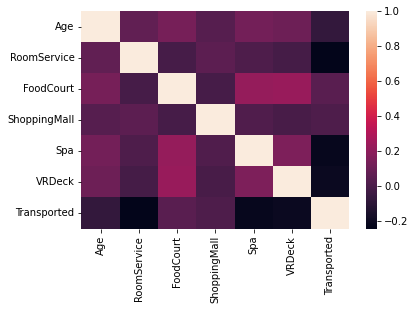

In [27]:
sns.heatmap(spaceship.corr())

Filling Null Values of Cabin

In [28]:
spaceship["Cabin"].fillna("0/0/0",inplace=True)

Dividing Cabin Column into 3 Parts

In [29]:
spaceship["Cabin1"]=spaceship["Cabin"].apply(lambda x:str(x).split("/")[0])
spaceship["Cabin2"]=spaceship["Cabin"].apply(lambda x:str(x).split("/")[1])
spaceship["Cabin3"]=spaceship["Cabin"].apply(lambda x:str(x).split("/")[2])

In [34]:
#Now, We have Cabin1, Cabin2, Cabin3 columns

In [30]:
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


Number of Unique Values

In [32]:
print(spaceship["Cabin1"].nunique())
print(spaceship["Cabin2"].nunique())
print(spaceship["Cabin3"].nunique())

9
1817
3


In [33]:
#We'll use 'Cabin1' and 'Cabin3'. Because 'Cabin2' have too many unique values.

Dropping Useless Columns

In [35]:
spaceship.drop(["PassengerId","Cabin","Cabin2"],axis=1,inplace=True)

In [36]:
# Now, We have to fill or drop our null values.

Filling 'RoomService', 'Spa' and 'VRDeck' Columns with interpolate

In [38]:
spaceship["RoomService"].interpolate(inplace=True)
spaceship["Spa"].interpolate(inplace=True)
spaceship["VRDeck"].interpolate(inplace=True)

Dropping 'Name' Column

In [40]:
spaceship.drop("Name",axis=1,inplace=True)

Number of 'HomePlanet' Values

c:\Users\umite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

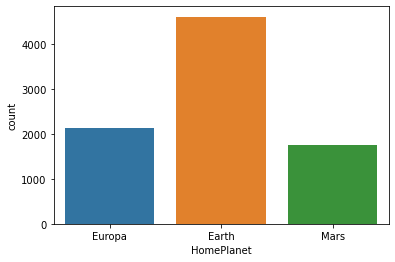

In [42]:
sns.countplot(spaceship["HomePlanet"])

In [50]:
# 'Earth' is dominant feature so fill it.

In [45]:
spaceship["HomePlanet"].fillna("Earth",inplace=True)

Filling 'Age', 'FoodCourt' and 'ShoppingMall' Columns with Mean

In [47]:
spaceship["Age"].fillna(spaceship["Age"].mean(),inplace=True)
spaceship["FoodCourt"].fillna(spaceship["FoodCourt"].mean(),inplace=True)
spaceship["ShoppingMall"].fillna(spaceship["ShoppingMall"].mean(),inplace=True)

Number of 'VIP' Values

c:\Users\umite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VIP', ylabel='count'>

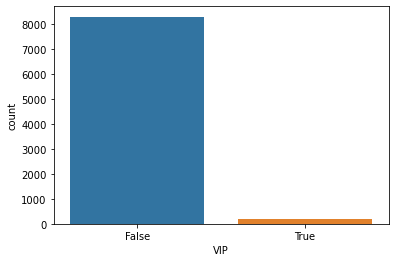

In [51]:
sns.countplot(spaceship["VIP"])

In [52]:
# 'False' is dominant feature so fill it.

In [53]:
spaceship["VIP"].fillna("False",inplace=True)

Number of 'Destination' Values

c:\Users\umite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

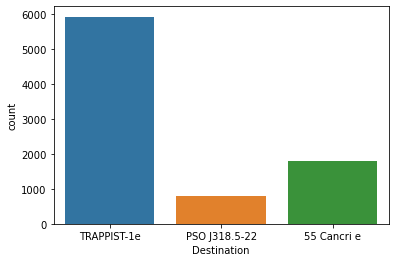

In [54]:
sns.countplot(spaceship["Destination"])

In [55]:
# 'TRAPPIST-1e' is dominant feature so fill it.

In [56]:
spaceship["Destination"].fillna("TRAPPIST-1e",inplace=True)

Null Values in Dataset

<AxesSubplot:>

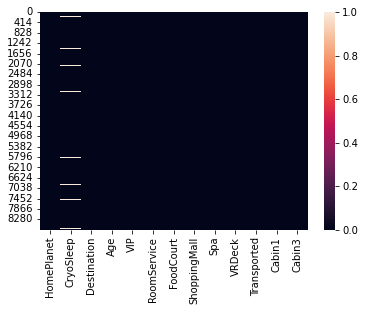

In [58]:
sns.heatmap(spaceship.isnull())

Dropping Other Null Values

In [59]:
spaceship.dropna(inplace=True)

<AxesSubplot:>

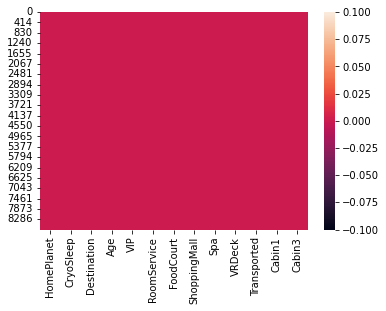

In [60]:
sns.heatmap(spaceship.isnull())

In [61]:
# Now, Our all columns are full.

Style Transformation on Categorical Features

In [62]:
spaceship=pd.get_dummies(spaceship,drop_first=True)

In [63]:
spaceship.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,...,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T,Cabin3_P,Cabin3_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Choosing 'X' and 'y' Columns

In [67]:
X=spaceship.drop("Transported",axis=1)
y=spaceship["Transported"]

Splitting Train and Test Set

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting XGBBClassifier Model

In [70]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Making Prediction by 'X_test'

In [72]:
y_preds=model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 1, 0])

Evaluating Prediciton of Model

In [74]:
accuracy_score(y_test,y_preds)

0.7983490566037735

Confusion Matrix

In [76]:
confusion_matrix(y_test,y_preds)

array([[649, 187],
       [155, 705]], dtype=int64)